In [1]:
##Map GoogleDrive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
##Create dataframe
import pandas as pd 
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/sup.csv')
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1623542400,3,1201.0,1.478556,1.48603,1.47800,1.483681,654799.561103,1.481439,-0.002594
1,1623542400,2,1020.0,580.306667,583.89000,579.91000,582.276667,1227.988328,581.697038,-0.009143
2,1623542400,0,626.0,343.789500,345.10800,343.64000,344.598000,1718.832569,344.441729,-0.004525
3,1623542400,1,2888.0,35554.289632,35652.46465,35502.67000,35602.004286,163.811537,35583.469303,0.003096
4,1623542400,4,433.0,0.312167,0.31260,0.31192,0.312208,585577.410442,0.312154,0.001426


In [4]:
##Drop unneeded columns
df.drop(['Count','Open', 'High', 'Low', 'Volume', 'VWAP', 'Target'], axis=1, inplace=True)
df.head()

,timestamp,Asset_ID,Close
0,1623542400,3,1.483681
1,1623542400,2,582.276667
2,1623542400,0,344.598000
3,1623542400,1,35602.004286
4,1623542400,4,0.312208


In [5]:
##Remove NaN cells
df.dropna(inplace = True)

In [6]:
#Reshape table - set Asset_ID (coins) as column labels
df=df.pivot_table(index=['timestamp'],columns=['Asset_ID'], values='Close').fillna(0)
df.head()

Asset_ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13
timestamp,,,,,,,,,,,,,,
1623542400,344.5980,35602.004286,582.276667,1.483681,0.312208,4.837583,2374.380714,55.344680,1.00330,162.214714,2947.078025,243.5325,0.328829,0.068158
1623542460,344.0895,35555.397143,582.358333,1.482043,0.311847,4.838300,2371.790000,55.286400,1.00155,162.193000,2945.711900,243.3300,0.328563,0.068217
1623542520,343.0095,35488.287500,580.540000,1.479259,0.311006,4.822080,2365.590000,55.026050,0.99750,161.829143,2933.232000,242.3475,0.327497,0.068025
1623542580,342.3250,35423.490000,578.912000,1.473527,0.310676,4.813450,2360.505714,54.940950,0.99100,161.485000,2925.073700,242.0740,0.326406,0.067936
1623542640,342.7115,35453.218571,578.955000,1.472372,0.311004,4.815560,2362.864536,54.868383,0.99145,161.433333,2928.523500,241.9880,0.326623,0.067961


In [7]:
#Export reshaped df to csv
df.to_csv(r'/content/gdrive/MyDrive/Colab Notebooks\reshaped.csv', index = False)

In [9]:
##Create new dataframe from the reshaped table
df1=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/reshaped.csv')
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,344.5980,35602.004286,582.276667,1.483681,0.312208,4.837583,2374.380714,55.344680,1.00330,162.214714,2947.078025,243.5325,0.328829,0.068158
1,344.0895,35555.397143,582.358333,1.482043,0.311847,4.838300,2371.790000,55.286400,1.00155,162.193000,2945.711900,243.3300,0.328563,0.068217
2,343.0095,35488.287500,580.540000,1.479259,0.311006,4.822080,2365.590000,55.026050,0.99750,161.829143,2933.232000,242.3475,0.327497,0.068025
3,342.3250,35423.490000,578.912000,1.473527,0.310676,4.813450,2360.505714,54.940950,0.99100,161.485000,2925.073700,242.0740,0.326406,0.067936
4,342.7115,35453.218571,578.955000,1.472372,0.311004,4.815560,2362.864536,54.868383,0.99145,161.433333,2928.523500,241.9880,0.326623,0.067961


In [10]:
df1.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
143993,362.9180,42899.012857,541.9020,2.067367,0.207445,4.188017,2964.711429,49.082117,1.28045,157.088714,2425.832500,231.9900,0.281798,0.091221
143994,362.2000,42860.005714,538.6900,2.066106,0.206920,4.179167,2960.845714,48.878480,1.27695,156.476286,2419.437500,231.2800,0.281025,0.090863
143995,361.8580,42827.020000,538.7750,2.064901,0.206797,4.175733,2957.398571,48.826767,1.27500,156.314000,2421.112000,231.1525,0.280435,0.090859
143996,364.1145,43017.277143,542.5125,2.080337,0.208621,4.198733,2977.190000,49.078275,1.28455,157.225000,2435.652250,232.2580,0.282077,0.091326
143997,363.7575,43002.505000,541.0450,2.079269,0.208294,4.195740,2972.603333,49.068150,1.28255,156.943857,2432.907467,232.2750,0.282051,0.091349


In [11]:
#Calculate Mutual Information
from sklearn.feature_selection import mutual_info_regression as mi_reg

def calculate_mutual_information(data):
  corr = pd.DataFrame();
  indep_vars = data.columns
  dep_vars = data.columns
  dep_var = 0
  #i is used to track execution of the code
  i=0
  for dep_var in dep_vars:
    i = i + 1
    print(i)
    result = mi_reg(data[indep_vars], data[dep_var])
    corr[dep_var] = result.tolist()
  corr.columns = data.columns
  corr.index = data.columns
  #export MI scores to .csv
  corr.to_csv("/content/gdrive/MyDrive/Colab Notebooks/mi_scores.csv")
  print(corr.head())
  
calculate_mutual_information(df1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
           0          1          2          3          4         5         6  \
0  10.533431   2.375954   2.309939   2.408082   2.063432  2.146036  2.488120   
1   2.375951  10.620182   2.411082   2.356271   2.166859  2.220364  2.669283   
2   2.309925   2.411079  10.529354   2.389005   2.093239  2.349827  2.464653   
3   2.408101   2.356273   2.389011  10.618334   2.171781  2.185088  2.519823   
4   2.063445   2.166857   2.093249   2.171781  10.593120  1.892841  2.182914   

          7         8         9        10        11        12        13  
0  2.159318  2.071692  2.247608  2.118177  1.988711  2.159074  2.450915  
1  2.153698  2.069204  2.345735  2.057838  2.147227  2.202204  2.517782  
2  2.238950  2.126993  2.613008  2.119447  2.021275  2.375240  2.509135  
3  2.207551  2.185864  2.324350  2.135135  1.997485  2.200681  2.541084  
4  2.200867  1.873809  1.961489  1.918805  1.781665  1.986875  2.199504  


In [12]:
#Reading the maximum value of the datafield/file(mi_scores.csv)
import numpy
dfx=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/mi_scores.csv')
dfx.pop('Unnamed: 0')
dfx.head()
max = dfx.max(numeric_only=True).max()
print(max)

#Subtract every cell value from max
values = numpy.array(dfx)
array = abs((values - max))

#New dataframe that has the final array for the minimum spanning tree
#Export the dataframe to file
dfy = pd.DataFrame(data=array)
dfy.to_csv("/content/gdrive/MyDrive/Colab Notebooks/MSI_entries.csv")
dfy.head()

10.620182142597


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.086751,8.244228,8.310243,8.212100,8.556750,8.474146,8.132062,8.460864,8.548490,8.372575,8.502005,8.631471,8.461108,8.169267
1,8.244231,0.000000,8.209101,8.263911,8.453323,8.399818,7.950899,8.466484,8.550978,8.274447,8.562344,8.472955,8.417979,8.102400
2,8.310257,8.209103,0.090828,8.231177,8.526943,8.270355,8.155529,8.381232,8.493189,8.007174,8.500735,8.598907,8.244942,8.111047
3,8.212081,8.263910,8.231171,0.001848,8.448401,8.435094,8.100360,8.412631,8.434318,8.295832,8.485047,8.622697,8.419501,8.079098
4,8.556737,8.453325,8.526933,8.448401,0.027062,8.727341,8.437269,8.419315,8.746373,8.658693,8.701377,8.838517,8.633307,8.420678


  (1, 6)	7.950899438592158
  (1, 11)	8.472954746931034
  (2, 12)	8.24494173751513
  (2, 13)	8.111046870530778
  (4, 7)	8.419315004549647
  (5, 2)	8.27033978783756
  (6, 0)	8.132049064325287
  (6, 7)	8.29124858518539
  (8, 13)	8.339892028781524
  (9, 2)	8.007149661409478
  (10, 6)	8.228292886480357
  (13, 3)	8.079096115431788
  (13, 6)	8.018934208392086


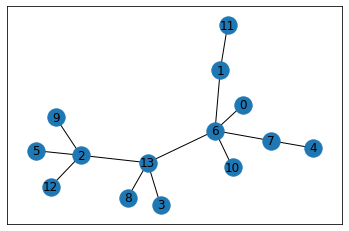

In [14]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

X=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/MSI_entries.csv')
X.pop('Unnamed: 0')
X.head()

#Generate values for the minimum spanning tree of the datafield
Tcsr = minimum_spanning_tree(X)
Tcsr.toarray().astype(float)

#Plot the minimum spanning tree
print(Tcsr)
MST = nx.Graph(Tcsr.toarray().astype(float))
nx.draw_networkx(MST, with_labels=True)